# Aula 6 - Matplotlib
O *Matplotlib* (https://matplotlib.org/) é a principal biblioteca para plotagem e visualização gráfica do Python. Posterioemente deu origem a outras ferramentas, como o Seaborn. Usaremos a convenção de importação do pacote como:

`import matplotlib as plt`

(caso não encontre o pacote, instale-o usando `pip install matplotlib` no terminal).
## 6.1 Introdução e plotagem simples
A funcionalidade mais básica para se plotar um gráfico é o `plt.plot()` com uma sequência de valores

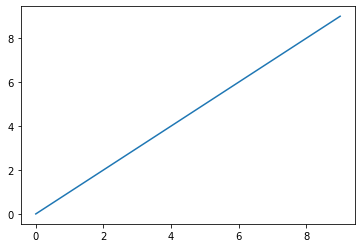

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(10))

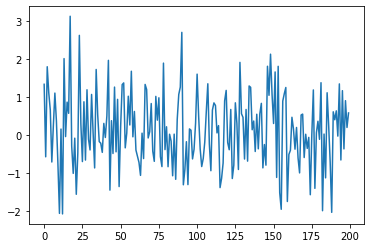

In [2]:
plt.plot(np.random.randn(200))

## 6.2 Subplotagens
O método `plt.figure()` cria uma figura, de forma que podemos adicionar subfiguras nela com o método `fig.add_subfigure()` dizendo o número de subfiguras que estarão na figura (como uma matriz), e indicando qual será a criada no momento.

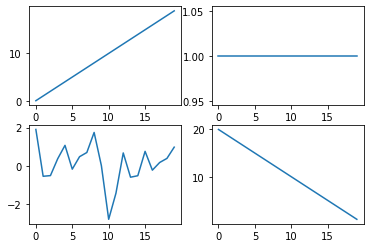

In [3]:
fig = plt.figure()

# Criando as subfiguras
fig1 = fig.add_subplot(2,2,1) # Em uma figura com 4 subfiguras, essa é a primeira
fig2 = fig.add_subplot(2,2,2)
fig3 = fig.add_subplot(2,2,3)
fig4 = fig.add_subplot(2,2,4)

# Gerando os gráficos
fig1.plot(np.arange(20))
fig2.plot(np.ones(20))
fig3.plot(np.random.randn(20))
fig4.plot([x for x in range(20,0,-1)])

Para exportar a Figura usamos o método `fig.save_fig()`. As Figuras podem ser salvas em diversos formatos, alguns deles são mostrados abaixo:

In [4]:
# Salvando as Figuras em .png .pdf e .svg
fig.savefig("Figura1.png")
fig.savefig("Figura1.pdf")
fig.savefig("Figura1.svg")

As subplotagens são tão comuns, que o matplotlib inclui um método conveniente: `plt.subplots`, que cria uma nova figura e devolve um array NumPy contendo objetos de subplotagens criados:

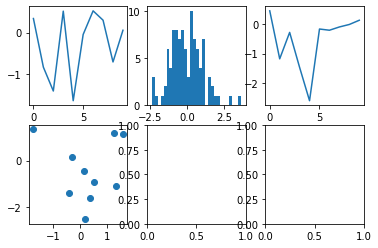

In [5]:
fig, axes = plt.subplots(2,3)

# Assim, podemos acessar as subplotagens em axes como uma matriz 2x3:
axes[0,0].plot(np.random.randn(10))
axes[0,1].hist(np.random.randn(100), bins = 30)
axes[0,2].plot(np.random.randn(10))
axes[1,0].scatter(np.random.randn(10),np.random.randn(10))


## 6.3 Tamanho, cores e marcadores
Podemos ajustar o **tamanho** geral da figura pelo método `set_size_inches()`, com os parametros *w* e *h* sendo as dimensões da largura e altura da figura.

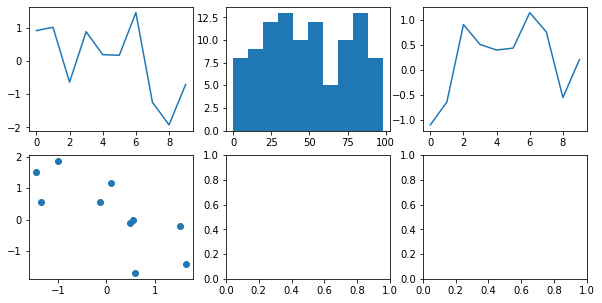

In [6]:
fig, axes = plt.subplots(2,3)
axes[0,0].plot(np.random.randn(10))
axes[0,1].hist(np.random.randint(0,100,100), bins = 10)
axes[0,2].plot(np.random.randn(10))
axes[1,0].scatter(np.random.randn(10),np.random.randn(10))
fig.set_size_inches(10,5)

Podemos controlar a porcentagem de espaço da figura total que é usado para separar os subgráficos, tanto em altura como largura, usando o método `plt.subplots_adjust()`, sendo os argumentos *wspace* e *hspace* a porcentagem usada nos espaços na largura e altura, respectivamente.

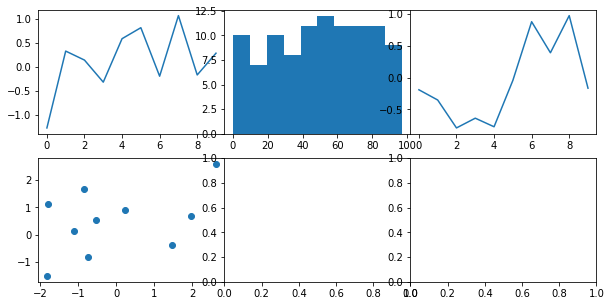

In [7]:
fig, axes = plt.subplots(2,3)
axes[0,0].plot(np.random.randn(10))
axes[0,1].hist(np.random.randint(0,100,100), bins = 10)
axes[0,2].plot(np.random.randn(10))
axes[1,0].scatter(np.random.randn(10),np.random.randn(10))

fig.set_size_inches(10,5)
plt.subplots_adjust(hspace = 0.2, wspace = 0)

Se os gráficos forem comparativos (ou seja, na mesma escala), podemos aproveitar os eixos x e y para não haver repetição. Para isso passamos o argumento `sharey=True` (para usarem o mesmo eixo y) e `sharex=True` (para usarem o mesmo eixo x) na criação da figura:

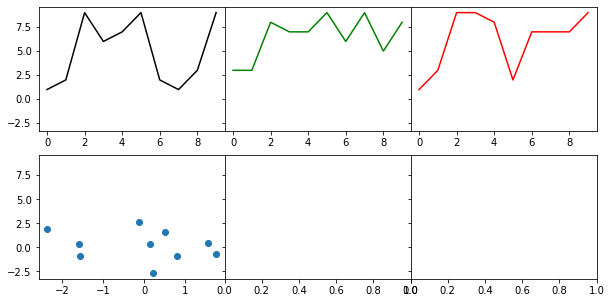

In [8]:
# Todos (de uma mesma linha) compartilham o mesmo eixo y
fig, axes = plt.subplots(2,3, sharey=True)
axes[0,0].plot(np.random.randint(1,10,10), color="black")
axes[0,1].plot(np.random.randint(1,10,10), color="green")
axes[0,2].plot(np.random.randint(1,10,10), color="red")
axes[1,0].scatter(np.random.randn(10),np.random.randn(10))

fig.set_size_inches(10,5)
plt.subplots_adjust(hspace = 0.2, wspace = 0)

As **cores** são controladas pelo argumento `color`, existem diversas formas de passar as cores, como strings ("red","blue","green",...) ou mesmo por hexa ("#CECECE"). Em gráficos de linha, podemos alterar o estila da linha com o argumento `linestyle` (--, por exemplo). Ainda, adicionar marcadores com o argumento `marker`.

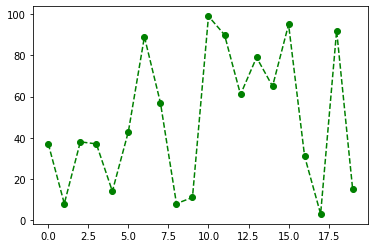

In [9]:
fig, ax = plt.subplots(1,1)
ax.plot(np.random.randint(0,100,20), marker="o", linestyle="--", color="green")

## 6.4 Títulos, eixos e legenda

Considere os dados sobre mortes de covid contido na base `daily-covid-cases-deaths.csv`, filtrando somente o Brasil e plotando em um gráfico de linha. Podemos inserir o título do gráfico com o método `set_title()`, o título do eixo x e y com `set_xlabel()` e `set_ylabel()`. 

Text(0, 0.5, 'Mortes')

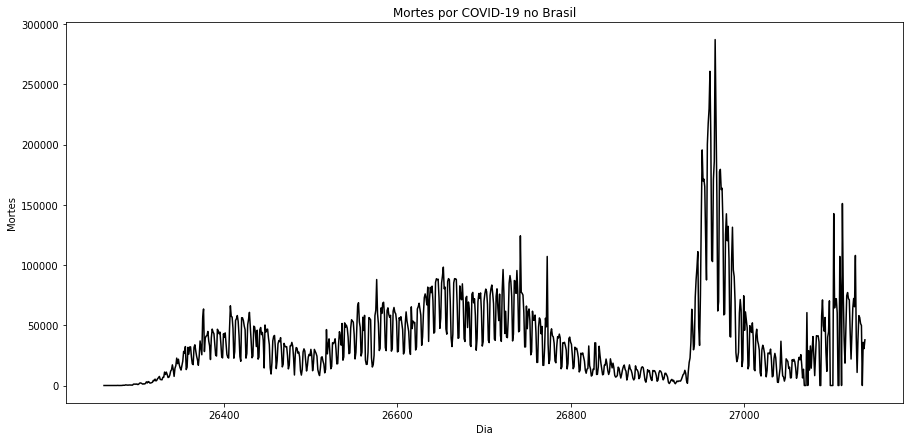

In [10]:
import pandas as pd

# Lendo os dados
dt = pd.read_csv(r"G:\Meu Drive\Arquivos\UFPR\Disciplinas\2 - Intro  Mineração de Dados\Python\Datasets\daily-covid-cases-deaths.csv", sep=",")

# Filtrando somente Brazil, e somente a coluna sobre as mortes
arr_brasil_deaths = dt[dt["Entity"]=="Brazil"]["Daily new confirmed cases of COVID-19"]
arr_brasil_deaths

# Plotando o gráfico
fig, axe = plt.subplots(1,1)
axe.plot(arr_brasil_deaths, color="black")
fig.set_size_inches(15,7)

# Titulo
axe.set_title("Mortes por COVID-19 no Brasil")

# Eixo x
axe.set_xlabel("Dia")

# Eixo y
axe.set_ylabel("Mortes")

Podemos plotar mais de um gráfico na mesma Figura, basta cria-los usando um mesmo eixo. Nesses casos se faz necessário adicionar legendas para cada série. Podemos fazer isso passando o argumento `label` no momento da criação do gráfico, em seguida `plt.legend()` para plotar a legenda. Considere o exemplo abaixo, em que plotamos as mortes por COVID do Brasil e da Alemanha em um mesmo gráfico, para fins de comparação.

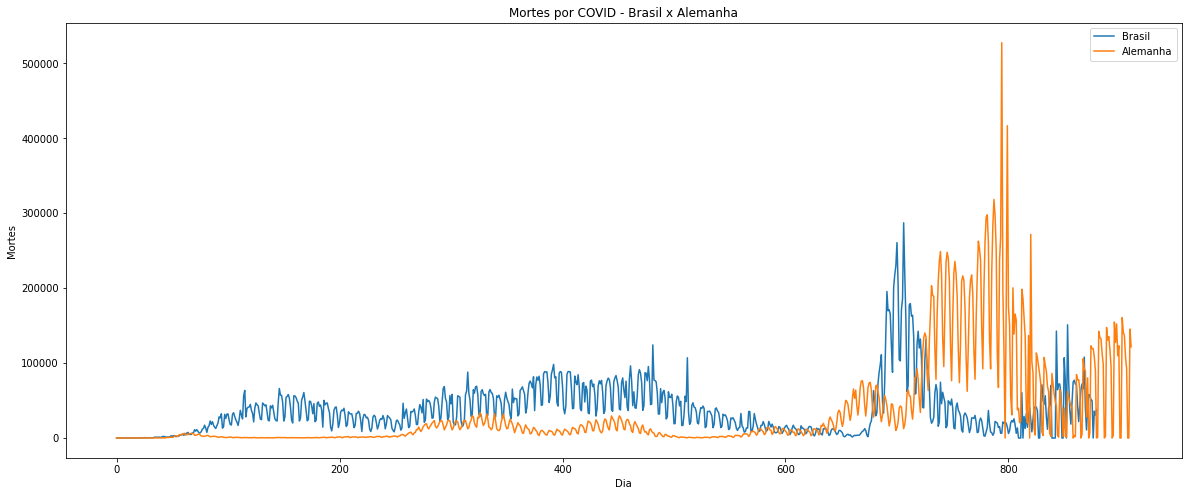

In [11]:
arr_deutsch_deaths = dt[dt["Entity"]=="Germany"]["Daily new confirmed cases of COVID-19"]
arr_deutsch_deaths

fig, axe = plt.subplots(1,1)
axe.plot(arr_brasil_deaths.values, label="Brasil")
axe.plot(arr_deutsch_deaths.values, label="Alemanha")
plt.legend()


# Adicionando Título e nome dos eixos
axe.set_title("Mortes por COVID - Brasil x Alemanha")
axe.set_xlabel("Dia")
axe.set_ylabel("Mortes")
fig.set_size_inches(20,8)


Podemos passar valores para os eixos. Considere um gráfico com temperaturas em um dia de semana. Desejamos usar o eixo x com o nome dos dias. Para isso usamos o método `set_xticks()` para marcar as posições dos *labels* e `set_tick_labels()` para dar os nomes. Considere o exemplo abaixo:

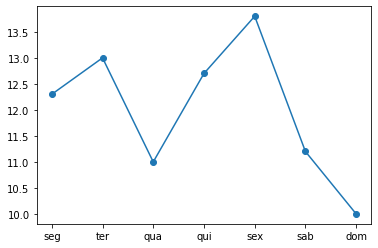

In [12]:
temperaturas = [12.3, 13.  ,11.  ,12.7 ,13.8 ,11.2 ,10.]
dias =         ["seg","ter","qua","qui","sex","sab","dom"]

fig, axe = plt.subplots(1,1)
axe.set_xticks([0,1,2,3,4,5,6])
axe.set_xticklabels(dias)
axe.plot(temperaturas, marker="o")


## 6.5 Anotações
Podemos inserir anotações ou mesmo imagens nos gráficos com o método `annotate()`. Em sua forma mais simples o método requer um texto e a posição `xy` que ele será adicionado ao gráfico. Considere o exemplo abaixo:

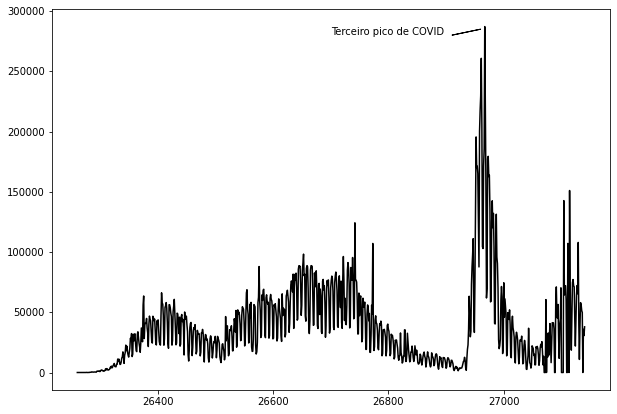

In [13]:
fig, axe = plt.subplots(1,1)
axe.plot(arr_brasil_deaths, color="black")
fig.set_size_inches(10,7)
axe.annotate("Terceiro pico de COVID",xy = (26700,280000))

# Inserindo uma seta que parte de x,y e termina em x + dx e y + dy.
axe.arrow(26910,280000, 50,5000)

## 6.6 Tipos de gráficos
Existem inúmeros tipos de gráficos no pacote Matplotlib, um resumo de todos é apresentado na Figura abaixo:
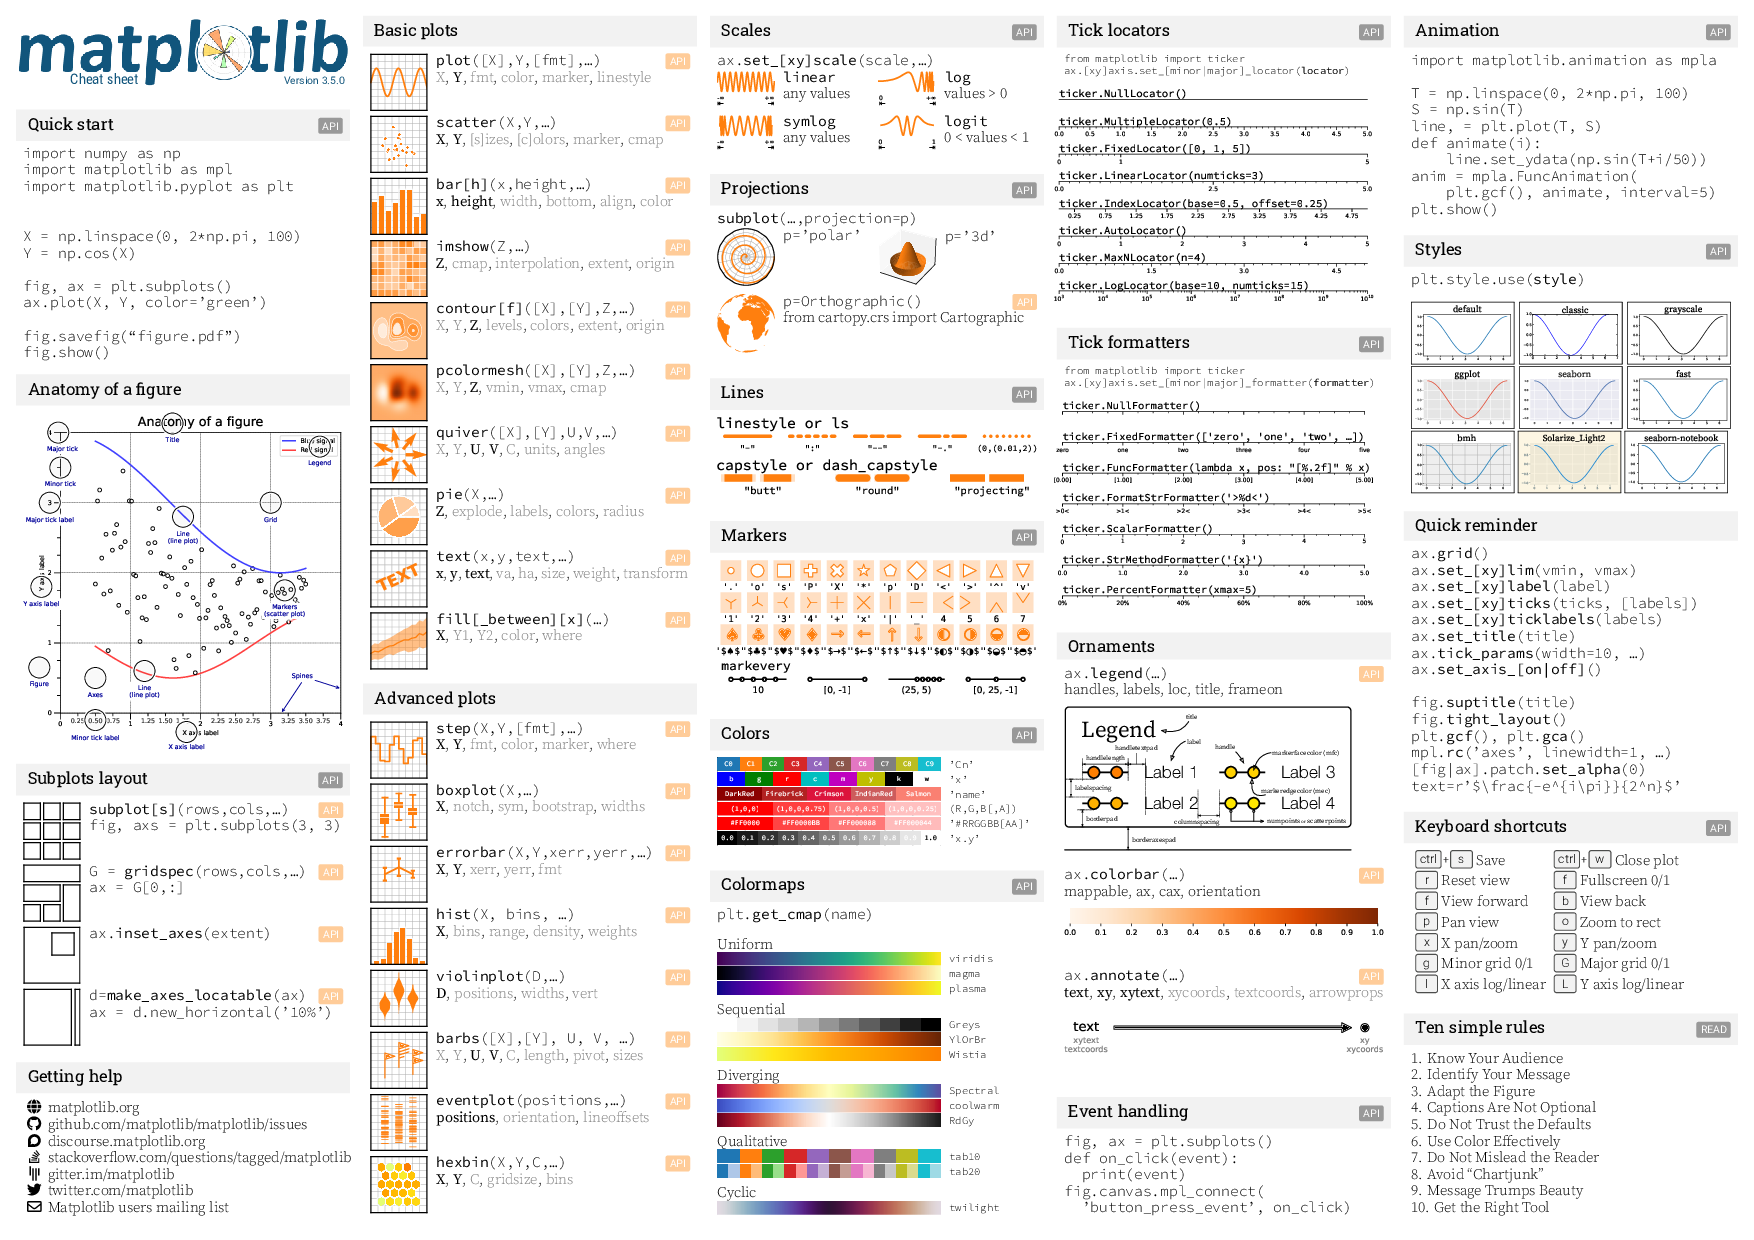

### 6.6.1 Linhas

Como já visto, o gráfico de linhas é o mais simples, usado com `.plot()` (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). O gráfico de linhas é adequado para visualizar séries temporais.

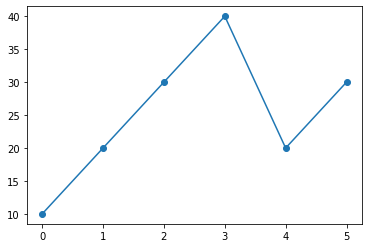

In [14]:
fig, ax = plt.subplots(1,1)
x = [10,20,30,40,20,30]
ax.plot(x, marker = "o")

### 6.6.2 Dispersão (scatterplot)
O gráfico de dispersão (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter) é adequado para se verificar a correlação entre variáveis. Usamos o método `scatter()`. Considere um conjunto com dados imabiliario, contendo registros sobre a área total de um imóvel e seu preço. Podemos dizer que existe uma correlação entre as duas variáveis? Considere o código abaixo:

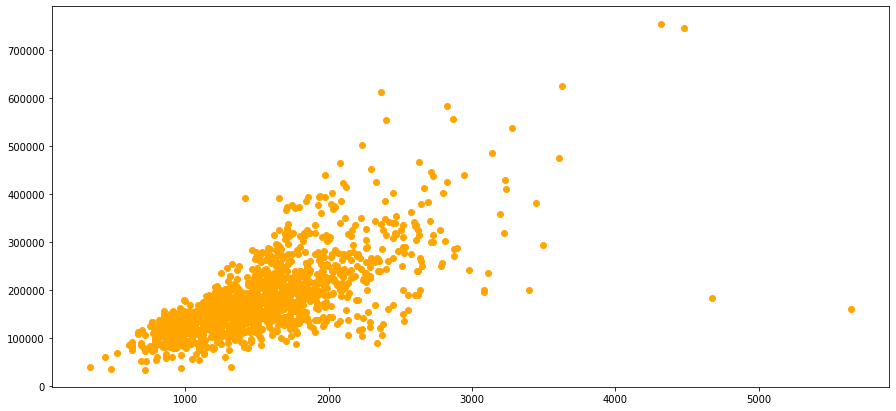

In [15]:
# Importando os dados apartment.csv
dt_apartment = pd.read_csv(r"G:\Meu Drive\Arquivos\UFPR\Disciplinas\2 - Intro  Mineração de Dados\Python\Datasets\apartment.csv", sep=",")
dt_apartment

fig, ax = plt.subplots(1,1)
ax.scatter(dt_apartment["GrLivArea"], dt_apartment["SalePrice"], color="orange")
fig.set_size_inches(15,7)

### 6.6.3 Barras
O gráfico de barras (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) pode cumprir a mesma funcionalidade do gráfico de linhas. Usamos a função `bar()`, passando dois parâmetros: um com as posições no eixo x e outro com os valores do eixo y.

Text(0.5, 0, 'Dias')

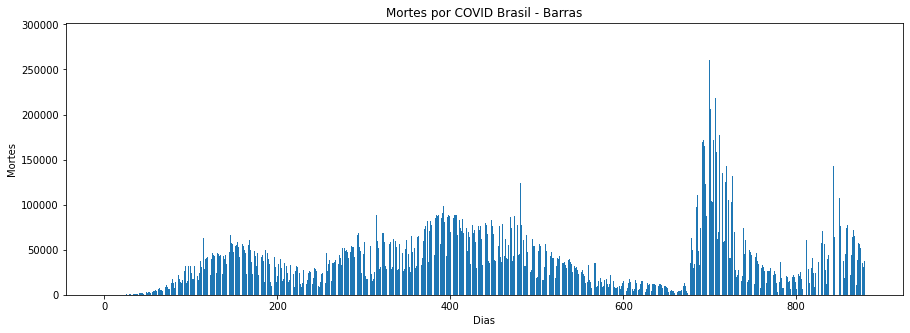

In [16]:
fig, axe = plt.subplots(1,1)
axe.bar(np.arange(arr_brasil_deaths.shape[0]),arr_brasil_deaths.values)
fig.set_size_inches(15,5)
axe.set_title("Mortes por COVID Brasil - Barras")
axe.set_ylabel("Mortes")
axe.set_xlabel("Dias")

### 6.6.4 Contorno
O gráfico de contorno é utilizado para plotar funções de duas variáveis (X e Y, por exemplo), com um resultado Z. Ela não mostra a visualização 3D, mas sim um corte em linhas de contorno. Usamos a função `contour()`, e passamos 3 argumentos: um 2darray com valores de x, um 2darray com valores de y, e os valores resultantes da função f(x,y) = Z. os valores de x e y são as coordenadas do grid. Considere o exemplo abaixo, em que x e y são criados a partir da imagem:

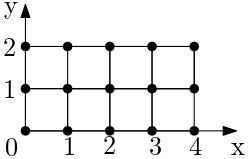

E a função Z é $f(x,y) = x^2 + y^2$

[[0.         1.         2.         3.        ]
 [1.         1.41421356 2.23606798 3.16227766]
 [2.         2.23606798 2.82842712 3.60555128]]


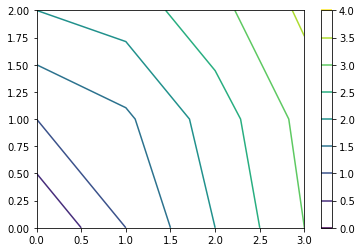

In [17]:
X = np.array([[0,1,2,3],
              [0,1,2,3],
              [0,1,2,3]])

Y = np.array([[0,0,0,0],
              [1,1,1,1],
              [2,2,2,2]])

Z = np.sqrt(X**2 + Y**2)
print(Z)
fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, Z)

fig.colorbar(cp)


Podemos criar os 2darrays a partir de vetores dos eixos, usando a função `np.mashgrid()`. Usando `contourf()` os espaços entre as linhas de contorno são preenchidos com cores.

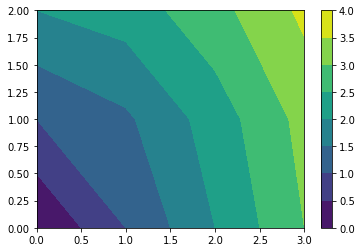

In [18]:

#xlist = np.linspace(-3.0, 3.0, 100)
#ylist = np.linspace(-3.0, 3.0, 100)
xlist = np.array([0,1,2,3])
ylist = np.array([0,1,2])

X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)


### 6.6.5 Pizza
O gráfico de pizza é recomendado para verificar as proporções de alguma medida em relação ao total dos dados. Usamos a função `pie()` com um conjunto de valores. As proporções serão plotadas em relação a soma dos dados.

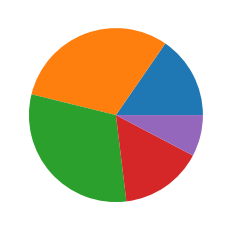

In [19]:
y = [10,20,20,10,5]
plt.pie(y)
plt.show()

Podemos adicionar os nomes da partes passando o conjunto na criação, como argumento `labels`:

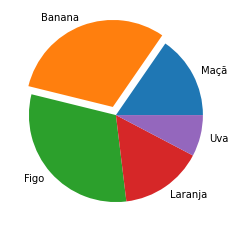

In [20]:
y = [10,20,20,10,5]
explode = (0, 0.1, 0, 0,0)
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, explode = explode, labels = nomes)
plt.show()

Usando o parâmetro `explode` podemos passar um vetor com a porcentagem de distanciamento da fatia em relação ao todo:

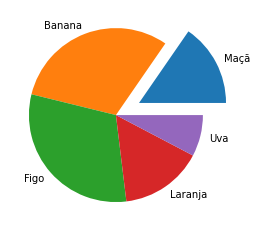

In [21]:
y = [10,20,20,10,5]
explode = (0.3, 0.0, 0, 0,0)
nomes = ["Maçã","Banana","Figo","Laranja", "Uva"]
plt.pie(y, explode = explode, labels = nomes)
plt.show()

### 6.6.6 Histograma
O histograma (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) é um gráfico para avaliar a *frequência* de alguma ocorrencia. O Histograma cria um gráfico de barras separado por faixas de valores, sendo que em cada faixa uma barra é plotada com a frequência de ocorrência da variável. De forma simples plotamos um histograma com a função `hist()` e um conjunto de dados.

Considere uma uma empresa de usinagem realizando o controle de qualidade de uma peça, que deve ter diâmetro de $15 \pm 0.2$cm. Seja uma amostra coletada pelo controle de qualidade dada pelo array abaixo:

In [22]:
medidas = np.random.normal(15,0.25,100)
medidas

array([14.82136615, 15.14683419, 15.21548371, 15.06104051, 14.91777039,
       15.14702021, 15.10510012, 14.79197357, 14.8686939 , 15.05152357,
       15.37441842, 15.19247551, 14.90533945, 14.87446823, 14.74492825,
       15.00784912, 15.33750871, 14.41786539, 15.52718653, 14.89021724,
       15.17104616, 14.51028326, 15.33411437, 14.9818576 , 14.58834899,
       15.46690683, 15.08207782, 15.04619522, 15.14143201, 15.41611915,
       14.68188334, 14.87965713, 15.21471   , 15.14250187, 14.60198675,
       14.92893325, 15.12807038, 15.12232009, 14.99664267, 14.92709314,
       14.95843968, 14.64621776, 14.60811934, 15.40008118, 15.13507558,
       14.51798995, 14.75809139, 14.75064984, 15.35991562, 14.77144961,
       15.00248667, 15.47200944, 15.10885332, 15.05916913, 15.2696536 ,
       15.0032834 , 15.11000469, 15.40386054, 14.9992753 , 15.1123174 ,
       15.34471825, 15.05073661, 15.18434634, 14.9737047 , 14.98783359,
       15.01119063, 14.64663604, 14.44754071, 15.21777104, 15.04

Usamos o histograma para ver a distribuição dos dados:

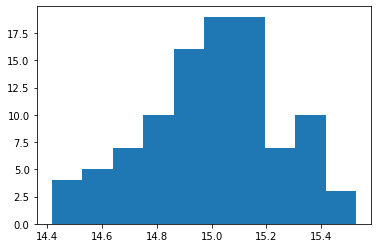

In [23]:
fi, ax = plt.subplots(1,1)
ax.hist(medidas)
plt.show()

Percebemos que a maioria dos valores está entre 15 e 15.4cm, porém existem peças que estão abaixo e acima desses valores, o que pode demandar um olhar mais atento pelo departamento de qualidade.

Podemos passar alguns argumentos:

`bins`: Número de faixas do histograma.

`rwidt`: % de largura das barras relativamente ao tamanho do bin.

`orientation`: Se as barras ficam dispostas na vertical ou na horizontal.

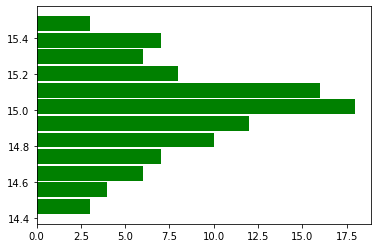

In [24]:
fi, ax = plt.subplots(1,1)
ax.hist(medidas, bins = 12, rwidth = 0.9, color = "green", orientation = "horizontal")
plt.show()

### 6.6.7 Boxplot
O Boxplot, como o histograma, nos permite fazer uma avaliação sobre a distribuição dos dados. O Box plot contém muitas informações sobre a amostra: o valor mínimo e o máximo, possíveis outliers e os 3 primeiros quartis (que separam as dados em 4 conjuntos, de acordo com suas frequências). Para plotarmos o histograma usamos a função `boxplot()`, passando os dados como argumento. Considere o mesmo conjunto de dados da empresa de usinagem:

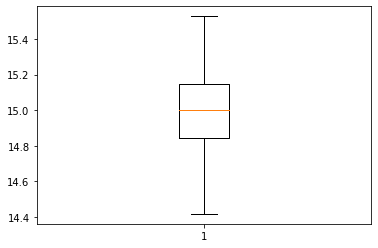

In [25]:
fig, ax = plt.subplots(1,1)
ax.boxplot(medidas)
plt.show()

Alguns parâmetros que podemos passar para a função:

`notch`: True ou False, desenha o intervalo de confiança ao redor da mediana (usando aproximação Gaussiana)

`labels`: Nomes para os dados (um para cada conjunto).

`vert`: True ou False, Se o boxplot é plotado horizontamente.

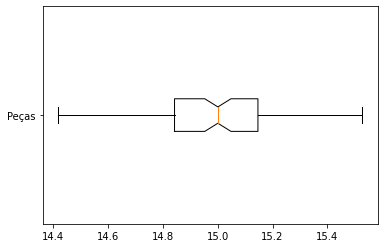

In [26]:
fig, ax = plt.subplots(1,1)
ax.boxplot(medidas, notch=True, labels = ["Peças"], vert=False)
plt.show()

Podemos usar o boxplot para visualizar diversos conjuntos de dados de uma só vez, bastando criar um array (ou lista) de duas dimensões, com todos os conjuntos de dados. Considere que a mesma empresa de usinagem coletou as medidas durante os 5 dias da semana (gerando 5 amostras), e deseja verificar se existe alguma tendência nas medidas ao longo da semana. Considere o código:

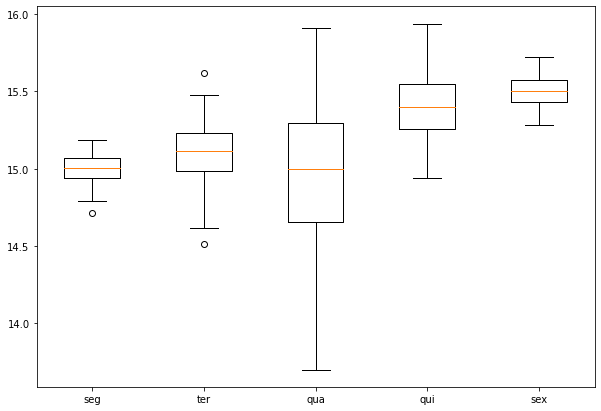

In [27]:
# Gerando dados para simular as medias:
arr_seg = np.random.normal(15,0.1,100)
arr_ter = np.random.normal(15.1,0.2,100)
arr_qua = np.random.normal(15,0.4,100)
arr_qui = np.random.normal(15.4,0.2,100)
arr_sex = np.random.normal(15.5,0.1,100)

# Criando os dados em 2 dimensões
dados = [arr_seg, arr_ter, arr_qua, arr_qui, arr_sex]

# Criando os nomes dos dias da semana
nomes = ["seg", "ter", "qua", "qui", "sex"]

fig, ax = plt.subplots(1,1)
ax.boxplot(dados, labels = nomes)
fig.set_size_inches(10,7)
plt.show()

O que podemos dizer olhando o gráfico? A média dos valores está aumentando conforme a semana passa. Da mesma forma, no meio da semana, embora a média fique mais próxima do valore alvo (15), percebe-se que a variabilidade aumenta muito neste dia.

<div style="background-color:gray">
    <h1 style = "text-align:center; color:white"> Exercícios</h1>
</div>

1. Considerando o conjunto de dados *daily-covid-cases-deaths.csv*. Este conjunto contém dados referente ao número de mortes e infecções por COVID no mundo. Responda às perguntas e faça o que se pede (todos os gráficos devem ter título e nome nos eixos):
    1. Qual é o intervalo de tempo em que os dados foram coletados para o Brasil?
    2. Plote as mortes no Brasil em um gráfico de barras.
    3. Plote as mortes no Brasil por meses, considerando somente o ano de 2021.
    4. Plote um gráfico de barras com os 10 paises (ou grupos) com mais mortes totais no banco de dados.
    5. Plote todos os gráficos acima em uma mesma figura, cada um com cores diferentes.

2. Considerando o conjunto de dados *producao_grega.csv*. Este conjunto contém os dados de medição do diametro de peças de cerâmica `peca1` e `peca2`, da coluna `peça`, durante uma semana.  Os dias são representados numéricamente na coluna `dia` e as medições em `Medicao`. A coluna `Colaborador` contém o dado de quem coletou a medida, e `Temperatura` a temperatura durante a coleta. Os defeitos que foram encontrados (se foram) são anotados na coluna `Nome defeito`, sendo que a coluna `Defeito?` atribui 1 para a ocorrência de defeito na peça coletada. Faça o que se pede (em todos os gráficos, insira bordas, altere a cor e coloque legendas nos eixos e títulos):
    1. Quantas amostras foram coletadas por cada Colaborador?
    2. Plote um gráfico de barra mostrando as amostras por colaborador.
    3. Plote uma figura com dois gráficos de barras com a produção de cada colaborador, porém separando pelas duas peças.
    4. Plote a proporção de coletas de peça1 e peça 2 em um gráfico de pizza. Destaque a parte do gráfico referente ao maior número de peças (de forma automática, sendo que se os dados forem alterados o gráfico também o será).
    5. Existe um bom palpite para a distribuição de probabilidade das peças? Plote uma figura com dois histogramas, um para cada peça, para ajudar a visualizar.
    6. Como a distribuição das medidas (por peça) é afetada pelos dias da semana? Plote uma figura com dois gráficos, um para cada peça, e em cada gráfico um boxplot para cada dia da semana, referente às medições coletadas.
    7. Existe alguma relação entre as temperaturas e as medições aferidas? Plote uma figura com dois gráficos do tipo scatterplot para responder à questão.
    8. Sabemos que pelo principio de Pareto 80% de consequências são devidos à 20% de causas. Para visualizar esse principio em relação à frequência de defeitos, crie um gráfico de Pareto e verifique quais defeitos deveriam ser tratados primeiro. (para plotar dois eixos em um mesmo gráfico considere `ax.twinx()` https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html).
